In [48]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [49]:
ticker = "MSFT"
df = yf.download(ticker, start="2010-01-01", auto_adjust=True)
df.columns = df.columns.get_level_values(0)
print(f"Fetched {len(df)} rows of data from {ticker}.")

[*********************100%***********************]  1 of 1 completed

Fetched 3993 rows of data from MSFT.


In [50]:
print(df.head(5))

Price           Close       High        Low       Open    Volume
Date                                                            
2010-01-04  23.173336  23.285646  22.903791  22.926254  38409100
2010-01-05  23.180830  23.285654  22.941235  23.098470  49749600
2010-01-06  23.038572  23.270680  22.851389  23.120932  58182400
2010-01-07  22.798979  22.986163  22.604308  22.933750  50559700
2010-01-08  22.956207  23.120928  22.641739  22.671689  51197400


In [51]:
print(df.tail(5))

Price            Close        High         Low        Open    Volume
Date                                                                
2025-11-10  506.000000  506.850006  498.799988  500.040009  26101500
2025-11-11  508.679993  509.600006  502.350006  504.799988  17980000
2025-11-12  511.140015  511.670013  499.119995  509.359985  26574900
2025-11-13  503.290009  513.500000  501.290009  510.309998  25273100
2025-11-14  510.179993  511.600006  497.440002  498.230011  28230907


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3993 entries, 2010-01-04 to 2025-11-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3993 non-null   float64
 1   High    3993 non-null   float64
 2   Low     3993 non-null   float64
 3   Open    3993 non-null   float64
 4   Volume  3993 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 187.2 KB


In [53]:
print(df.isnull().sum())

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


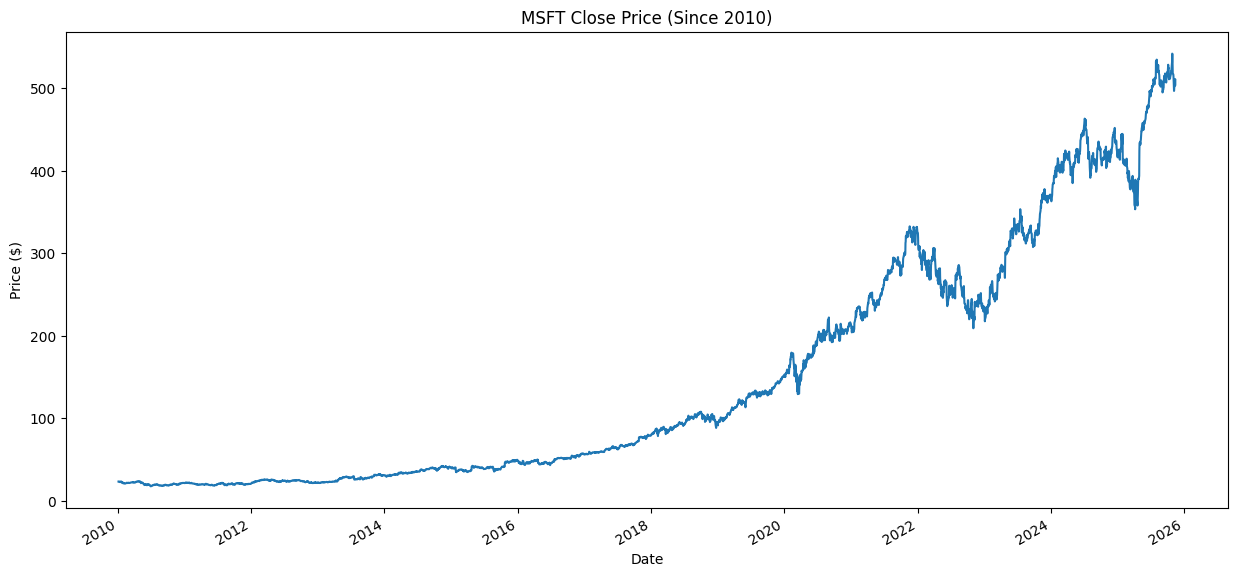

In [54]:
df['Close'].plot(figsize=(15,7), title=f"{ticker} Close Price (Since 2010)")
plt.ylabel("Price ($)")
plt.show()

In [55]:
location = f'../data/{ticker}_data_raw.csv'
df.to_csv(location)
print(f"Raw data for {ticker} saved in {location}.")

Raw data for MSFT saved in ../data/MSFT_data_raw.csv.


In [56]:
def create_clean_dataframe(raw_data):
    clean_df = raw_data.copy()
    cols = ['Close', 'Volume']
    clean_df = clean_df[cols].copy()
    clean_df['Tomorrow_Close'] = clean_df['Close'].shift(-1)
    clean_df['Target'] = (clean_df['Tomorrow_Close'] > clean_df['Close']).astype(int)
    clean_df['Daily_Return'] = clean_df['Close'].pct_change()
    clean_df = clean_df.dropna()
    return clean_df

In [57]:
clean_df = create_clean_dataframe(df)
print(clean_df.head(5))
print(clean_df.tail(5))
clean_df.info()

Price           Close    Volume  Tomorrow_Close  Target  Daily_Return
Date                                                                 
2010-01-05  23.180830  49749600       23.038572       0      0.000323
2010-01-06  23.038572  58182400       22.798979       0     -0.006137
2010-01-07  22.798979  50559700       22.956207       1     -0.010400
2010-01-08  22.956207  51197400       22.664206       0      0.006896
2010-01-11  22.664206  68754700       22.514462       0     -0.012720
Price            Close    Volume  Tomorrow_Close  Target  Daily_Return
Date                                                                  
2025-11-07  496.820007  24019800      506.000000       1     -0.000563
2025-11-10  506.000000  26101500      508.679993       1      0.018478
2025-11-11  508.679993  17980000      511.140015       1      0.005296
2025-11-12  511.140015  26574900      503.290009       0      0.004836
2025-11-13  503.290009  25273100      510.179993       1     -0.015358
<class 'panda

In [58]:
print(clean_df['Target'].value_counts(normalize=True))

Target
1    0.52443
0    0.47557
Name: proportion, dtype: float64


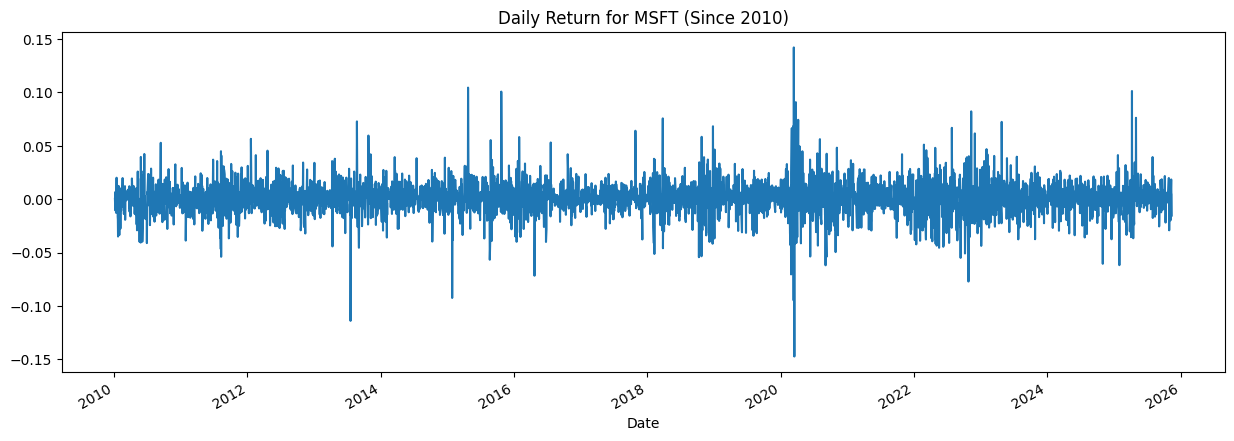

In [59]:
clean_df['Daily_Return'].plot(figsize=(15,5), title=f"Daily Return for {ticker} (Since 2010)")
plt.show()

In [60]:
location = f'../data/{ticker}_data_clean.csv'
clean_df.to_csv(location)
print(f"Clean data for {ticker} saved in {location}.")

Clean data for MSFT saved in ../data/MSFT_data_clean.csv.
